# **THE SPARKS FOUNDATION GRIP PROGRAM**
## Data Science and Business Analytics Internship #GRIPAPR21

##**Task 3 : Prediction using Decision Tree Algorithm**
### Intern : Ketaki Patil

- Create the Decision Tree classifier and visualize it graphically.
- The purpose is if we feed any new data to this classifier, it would be able to
predict the right class accordingly.

###**Import Libraries and Read data**

In [1]:
import pandas as pd
import numpy as np  
import matplotlib.pyplot as plt  

In [2]:
df=pd.read_csv('Iris.csv')
df.head()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


###**Data Wrangling**

In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [4]:
df.shape

(150, 6)

In [5]:
df.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


In [6]:
df.isnull().sum()

Id               0
SepalLengthCm    0
SepalWidthCm     0
PetalLengthCm    0
PetalWidthCm     0
Species          0
dtype: int64

### **Splitting Data into Training and Testing**

In [7]:
X, y = df.iloc[:, 1:5], df.iloc[:, 5]

In [8]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test=train_test_split(X, y, random_state=0)

### **Decision Tree Classifier**

In [9]:
from sklearn.tree import DecisionTreeClassifier
clf = DecisionTreeClassifier()
clf.fit(X_train, y_train)

DecisionTreeClassifier(ccp_alpha=0.0, class_weight=None, criterion='gini',
                       max_depth=None, max_features=None, max_leaf_nodes=None,
                       min_impurity_decrease=0.0, min_impurity_split=None,
                       min_samples_leaf=1, min_samples_split=2,
                       min_weight_fraction_leaf=0.0, presort='deprecated',
                       random_state=None, splitter='best')

In [10]:
clf.predict(X_test[0:1])

array(['Iris-virginica'], dtype=object)

### **Model Performance evaluation**

In [11]:
score = clf.score(X_test, y_test)
print(score)

0.9736842105263158


In [12]:
from sklearn import metrics
print(metrics.classification_report(y_test,clf.predict(X_test)))

                 precision    recall  f1-score   support

    Iris-setosa       1.00      1.00      1.00        13
Iris-versicolor       1.00      0.94      0.97        16
 Iris-virginica       0.90      1.00      0.95         9

       accuracy                           0.97        38
      macro avg       0.97      0.98      0.97        38
   weighted avg       0.98      0.97      0.97        38



In [13]:
cm = metrics.confusion_matrix(y_test, clf.predict(X_test))
cm

array([[13,  0,  0],
       [ 0, 15,  1],
       [ 0,  0,  9]])

### **Decision Tree Visualization**

In [14]:
from sklearn.externals.six import StringIO  
from IPython.display import Image  
from sklearn import tree
from sklearn.tree import export_graphviz
import pydotplus
import graphviz

/usr/local/lib/python3.7/dist-packages/sklearn/externals/six.py:31: FutureWarning: The module is deprecated in version 0.21 and will be removed in version 0.23 since we've dropped support for Python 2.7. Please rely on the official version of six (https://pypi.org/project/six/).
  "(https://pypi.org/project/six/).", FutureWarning)


In [15]:
#features and classes
fn = ['sepal length (cm)','sepal width (cm)','petal length (cm)','petal width (cm)']
cn = ['setosa', 'versicolor', 'virginica']

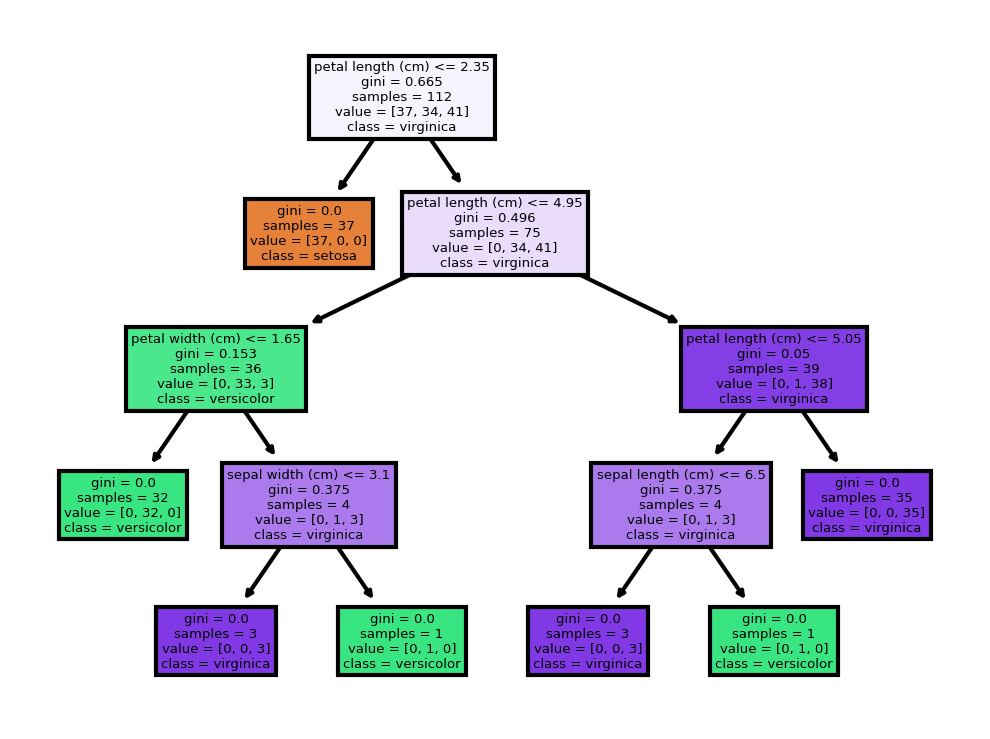

In [16]:
#Visualize decision tree
fig, axes = plt.subplots(nrows = 1, ncols = 1, figsize = (4,3), dpi = 300)
tree.plot_tree(clf,feature_names = fn, class_names=cn,filled = True);